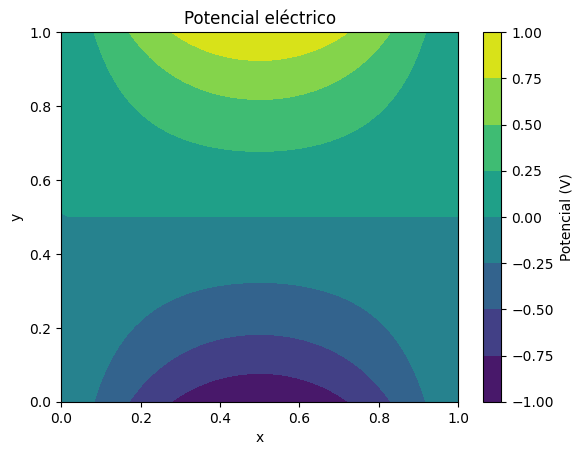

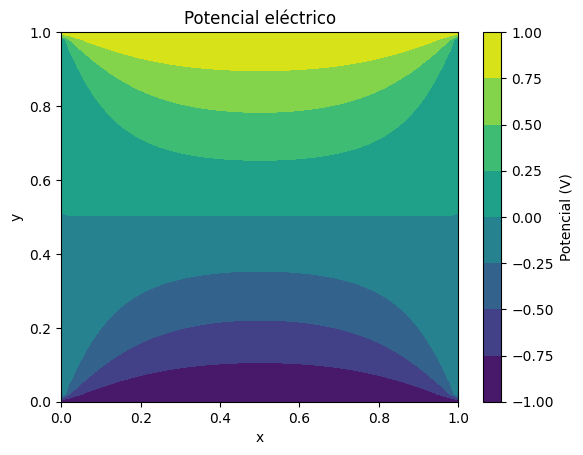

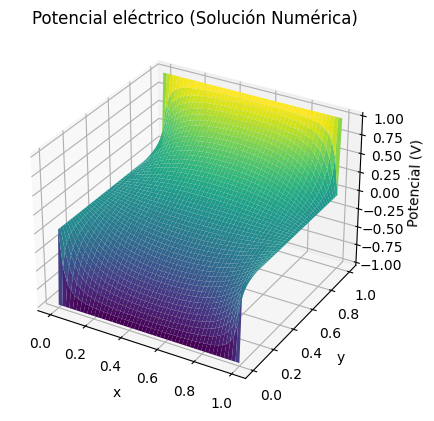

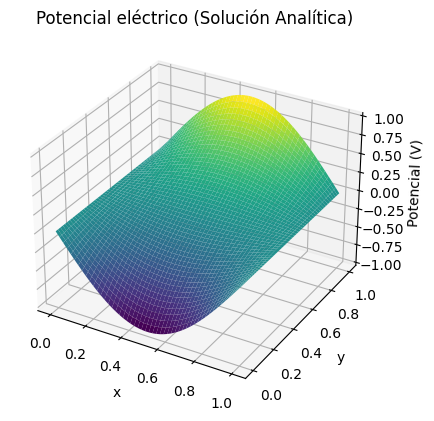

<Figure size 640x480 with 0 Axes>

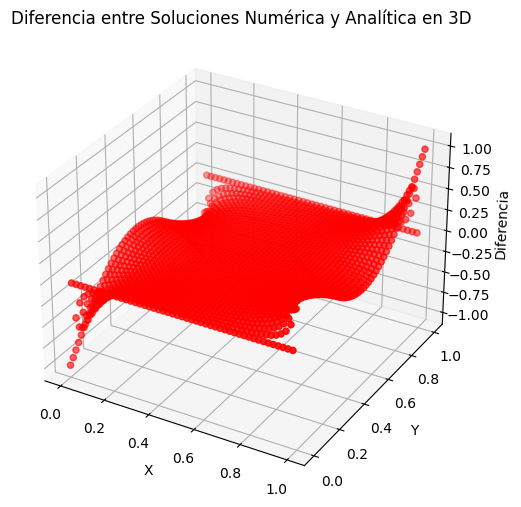

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Dimensiones de la región rectangular
a = 1.0  # Longitud en la dirección x
b = 1.0  # Longitud en la dirección y

# Número de puntos de malla en cada dirección
N = 50
M = 50

# Tamaño del paso en cada dirección
dx = a / N
dy = b / M

# Parámetro de las condiciones de frontera
v0 = 1.0

# Función para inicializar la matriz de potencial V
def initialize_V(N, M):
    V = np.zeros((N, M))
    # Condiciones de frontera en los bordes y = 0 y y = b
    V[:, 0] = -v0
    V[:, -1] = v0
    return V

# Función para aplicar el método de relajación de Gauss-Seidel
def gauss_seidel(V, dx, dy, tolerance=1e-4, max_iterations=10000):
    iterations = 0
    while iterations < max_iterations:
        max_residual = 0.0
        for i in range(1, N-1):
            for j in range(1, M-1):
                # Calcula el nuevo valor del potencial usando el método de Gauss-Seidel
                new_V = 0.25 * (V[i+1, j] + V[i-1, j] + V[i, j+1] + V[i, j-1])
                residual = np.abs(new_V - V[i, j])
                if residual > max_residual:
                    max_residual = residual
                V[i, j] = new_V
        iterations += 1
        if max_residual < tolerance:
            break
    return V

# Función para graficar el potencial V en 3D
def plot_potential_3d(V, dx, dy):
    x = np.linspace(0, a, N)
    y = np.linspace(0, b, M)
    X, Y = np.meshgrid(x, y)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, V.T, cmap='viridis')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('Potencial (V)')
    ax.set_title('Potencial eléctrico (Solución Numérica)')
    plt.savefig("SoluciónNumérica.png",bbox_inches='tight')
    plt.show()

# Función para calcular la solución analítica en el punto (x, y)
def analytical_solution(x, y, n_max=1):
    V = 0
    V1 = 0
    for n in range(1, n_max + 1):
        A_n=(4*v0/(np.pi*n)**2)*(1-(-1)**n)
        V += A_n*np.sin(n*np.pi*x/a)*((np.sinh(n*np.pi*y/a)*(1-np.cosh(n*np.pi*b/a))/np.sinh(n*np.pi*b/a))-np.cosh(n*np.pi*y/a))
    V1 = np.flip(V,axis=0)
    return (V1-V)/17.5

def plot_difference_scatter_3d(V_numerical, V_analytical, a, b):
    x = np.linspace(0, a, V_numerical.shape[0])
    y = np.linspace(0, b, V_numerical.shape[1])
    X, Y = np.meshgrid(x, y)
    diff = V_numerical - V_analytical
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(Y, X, diff, color='red')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Diferencia')
    ax.set_title('Diferencia entre Soluciones Numérica y Analítica en 3D')
    plt.savefig("Diferencia.png",bbox_inches='tight')

# Definir una cuadrícula de puntos para evaluar la solución analítica
x = np.linspace(0, a, N)
y = np.linspace(0, b, M)
X, Y = np.meshgrid(x, y)

# Calcular la solución analítica en la cuadrícula
V_analytical = analytical_solution(X, Y)

# Inicialización de la matriz de potencial V
V = initialize_V(N, M)

# Resolución de la ecuación de Laplace usando el método de Gauss-Seidel
V = gauss_seidel(V, dx, dy)

# Graficar el potencial V
fig = plt.figure()
x = np.linspace(0, a, N)
y = np.linspace(0, b, M)
X, Y = np.meshgrid(x, y)
plt.contourf(X, Y, V_analytical, cmap='viridis')
plt.colorbar(label='Potencial (V)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Potencial eléctrico')
plt.show()

# Graficar el potencial V
fig = plt.figure()
x = np.linspace(0, a, N)
y = np.linspace(0, b, M)
X, Y = np.meshgrid(x, y)
plt.contourf(X, Y, V.T, cmap='viridis')
plt.colorbar(label='Potencial (V)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Potencial eléctrico')
plt.show()

# Graficar el potencial V numérico en 3D
plot_potential_3d(V, dx, dy)


# Graficar el potencial V analítico en 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, V_analytical, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlim(-1,1)
ax.set_zlabel('Potencial (V)')
ax.set_title('Potencial eléctrico (Solución Analítica)')
plt.savefig("SoluciónAnalítica.png",bbox_inches='tight')
plt.show()

fig = plt.figure()
plot_difference_scatter_3d(V.T, V_analytical, a, b)
plt.show()
